# Exploring Relationships - Task. 6.2

## Script Contents:
### 1. Importing Visualization Libraries & Data
### 2. Exploring Relationships
### 3. Revisiting Questions

## 1. Importing Visualization Libraries & Data

In [1]:
# import libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# assign path

path = r'C:\Users\X1\House Sales Analysis Master'

In [2]:
# import House Sales dataset

df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','house_data_cleaned.csv'), index_col = False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21603 entries, 0 to 21602
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21603 non-null  int64  
 1   date           21603 non-null  object 
 2   price          21603 non-null  float64
 3   bedrooms       21603 non-null  int64  
 4   bathrooms      21603 non-null  float64
 5   sqft_living    21603 non-null  int64  
 6   sqft_lot       21603 non-null  int64  
 7   floors         21603 non-null  float64
 8   waterfront     21603 non-null  int64  
 9   view           21603 non-null  int64  
 10  condition      21603 non-null  int64  
 11  grade          21603 non-null  int64  
 12  sqft_above     21603 non-null  int64  
 13  sqft_basement  21603 non-null  int64  
 14  yr_built       21603 non-null  int64  
 15  yr_renovated   21603 non-null  int64  
 16  zipcode        21603 non-null  int64  
 17  lat            21603 non-null  float64
 18  long  

## 2. Exploring Relationships

### Create a corelation matrix heatmap

In [4]:
# Create subset, do not include "id" and "date"

sub = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [5]:
sub

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21598  360000.0         3       2.50         1530      1131     3.0   
21599  400000.0         4       2.50         2310      5813     2.0   
21600  402101.0         2       0.75         1020      1350     2.0   
21601  400000.0         3       2.50         1600      2388     2.0   
21602  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1               0     0          3      7        2170            400   
2               0     0          3      6         770              0   
3               0     0          5      7        1050            910   
4               0     0          3      8        1680              0   
...           ...   ...        ...    ...         ...            ...   
21598           0     0          3      8        1530              0   
21599           0     0          3      8        2310              0   
21600           0     0          3      7        1020              0   
21601           0     0          3      8        1600              0   
21602           0     0          3      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21598      2009             0    98103  47.6993 -122.346           1530   
21599      2014             0    98146  47.5107 -122.362           1830   
21600      2009             0    98144  47.5944 -122.299           1020   
21601      2004             0    98027  47.5345 -122.069           1410   
21602      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21598        1509  
21599        7200  
21600        2007  
21601        1287  
21602        1357  

[21603 rows x 19 columns]

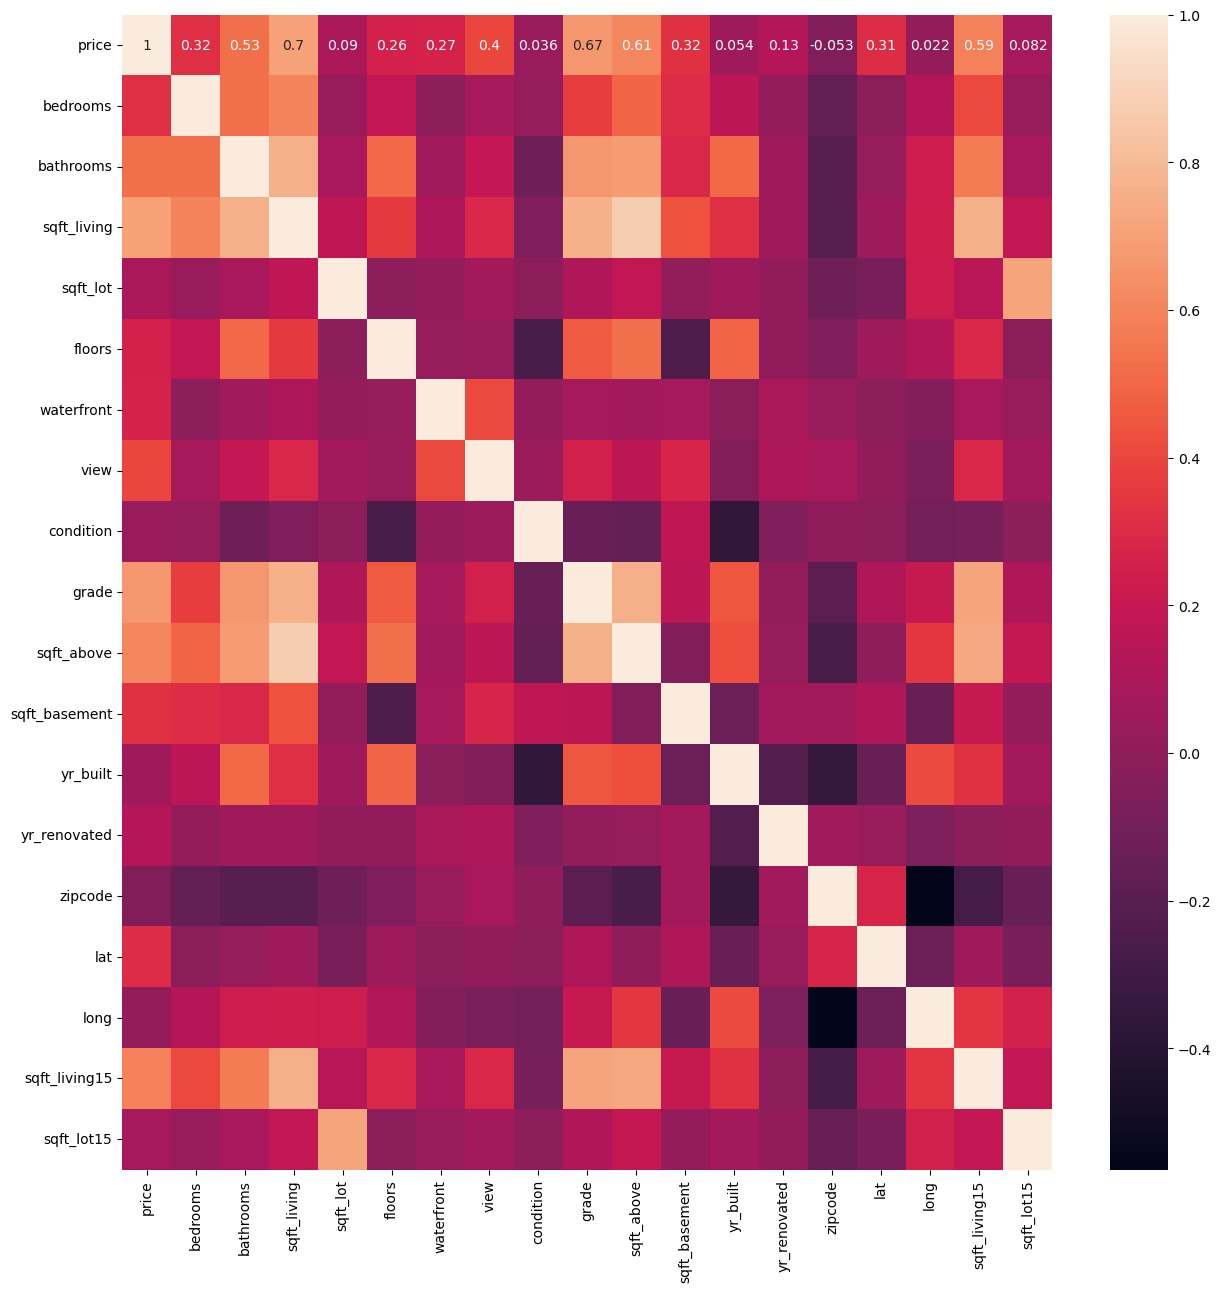

In [6]:
# Create a subplot with matplotlib

fig, ax = plt.subplots(figsize=(15,15))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 
# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

output_path = os.path.join(path, '04 Analysis','Visualizations', 'heatmap_house.png')
plt.savefig(output_path)

### Focusing on "price" which refers to how much the home was sold for:

#### Bedrooms: 0.32 indicates a weak negative correlation, surprisingly. I assumed a higher number of bedrooms would correlate to a higher price, but is the opposite in this case.  

#### Bathrooms: 0.53 indicates a strong positive correlation.  A home with multiple bathrooms is sold at a higher price.

#### Sqft_living: 0.7 indicates a strong positive correlation.  "The bigger, the more expensive" and "Smaller, but cheaper" is true, too.

#### Sqft_lot: 0.09 indicates no relationship. The total size of the lot did not affect the price of the home.

#### Floors: 0.26 indicates a weak negative correlation. This could be interpreted as single floor homes are valued higher.

#### Waterfront:0.27 indicates a weak correlation. Having a view of the water does not correlate to higher priced homes.

#### View: 0.4 indicates a moderate relationship. View is defined as how good the view of the proprerty was. Have a decent view meant the value of the home was higher.

#### Condition: 0.036 indicates no relationship to price. 

#### Grade: 0.67 indicates a strong relationship to price. Having a high grade meant the home was built with high quality.  Higher quality correlates to higher price.

#### Sqft_above: 0.61 indicates a strong correlation.  This refers to how much square feet above ground the property had. Thus, the bigger the more expensive.

#### Sqft_basement: 0.32 indicates a weak relationship.  Basement size lightly affected house price.

#### Yr_built: 0.054 indicates no relationship.  This could be interpreted as "the older the house, the lower the price."

#### Yr_renovated: 0.13 indicates a weak relationship.  If the house was renovated, it still did not strongly correlate to a higher selling price.

#### Zipcode: -0.053 indicates no relationship.  Zipcode did not affect price strongly.

#### Lat: 0.31 indicates a weak relationship

#### Long: 0.022 indicates a weak relationship

#### Sqft_living15: 0.59 indicates a strong relationship with price.  This refers to the square foot of living space for the 15 nearest neighbors.  It can be assumed that if the surrounding houses with larger square footage correlates to higher prices.

#### Sqft_lot15: 0.082 indicates no relationship.  The size of the lot did not affect prices.

### Create a scatterplot for variables with strongest correlations

#### Strongest correlations: Bathroom, Sqft_living, Grade, Sqft_above, Sqft_living15

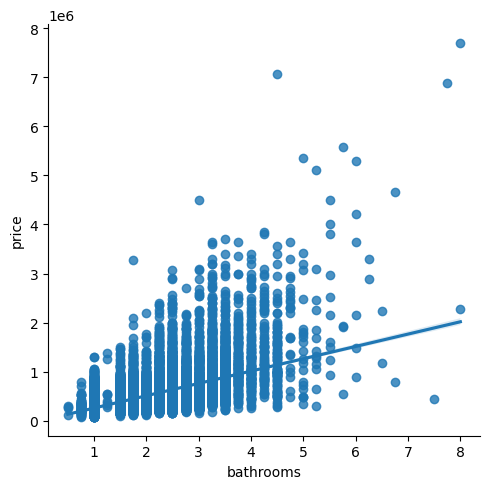

In [7]:
# Create scatterplot for "bathroom" and "price"

sns.lmplot(x = 'bathrooms', y = 'price', data = df)

output_path = os.path.join(path, '04 Analysis','Visualizations', 'scat_bathroom.png')
plt.savefig(output_path)

#### As expected, if a house has more bathrooms, the higher the price it will be.  However, there are still a good amount of homes with 5 or more bathrooms that are lower priced.

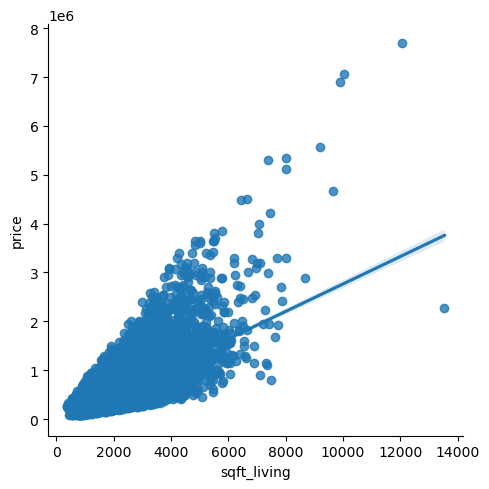

In [8]:
# Create scatterplot for "sqft_living" and "price"

sns.lmplot(x = 'sqft_living', y = 'price', data = df)

output_path = os.path.join(path, '04 Analysis','Visualizations', 'scat_sqftliving.png')
plt.savefig(output_path)

#### We can see that once houses start have 6000 sqft and more, the price shoots up.

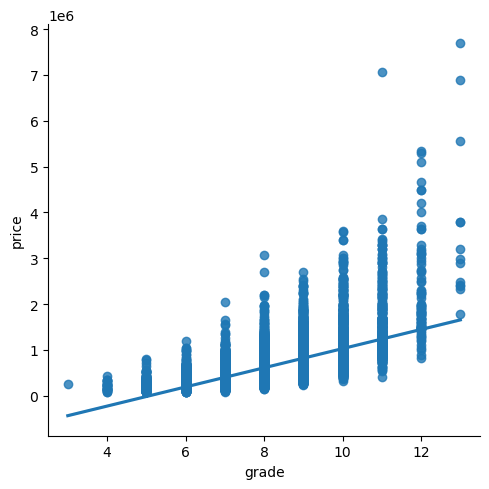

In [9]:
# Create scatterplot for "grade" and "price"

sns.lmplot(x = 'grade', y = 'price', data = df)

output_path = os.path.join(path, '04 Analysis','Visualizations', 'scat_grade.png')
plt.savefig(output_path)

#### According to the grade definition, have a grade of 7 is average. A higher grade correlates to higher priced homes.  We can see one outlier of a home with a grade of 11 is priced higher than homes with grade 12 or higher.

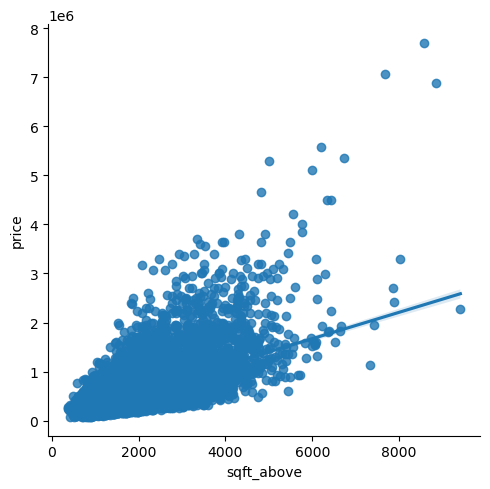

In [10]:
# Create scatterplot for "sqft_above" and "price"

sns.lmplot(x = 'sqft_above', y = 'price', data = df)

output_path = os.path.join(path, '04 Analysis','Visualizations', 'scat_sqftabove.png')
plt.savefig(output_path)

#### Similar to the sqft_living scatter plot, homes with larger sqft above ground increase in price.  

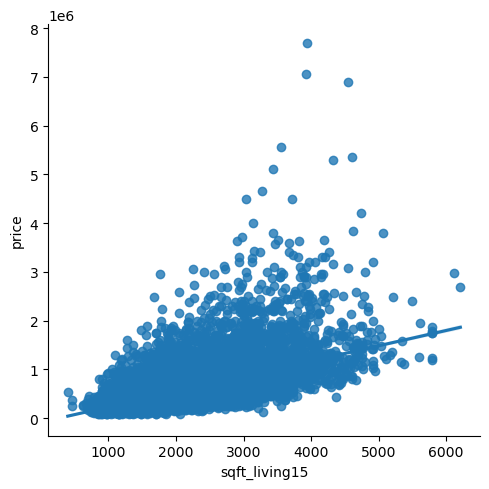

In [11]:
# Create scatterplot for "sqft_living15" and "price"

sns.lmplot(x = 'sqft_living15', y = 'price', data = df)

output_path = os.path.join(path, '04 Analysis','Visualizations', 'scat_sqftliving15.png')
plt.savefig(output_path)

#### It seems that if the surrounding homes are larger, this could affect the price of smaller homes in the same neighborhood.  Meaning smaller homes might cost higher than normal.

### Create a pair plot of the enitre data set

In [12]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

C:\Users\X1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\X1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\X1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\X1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

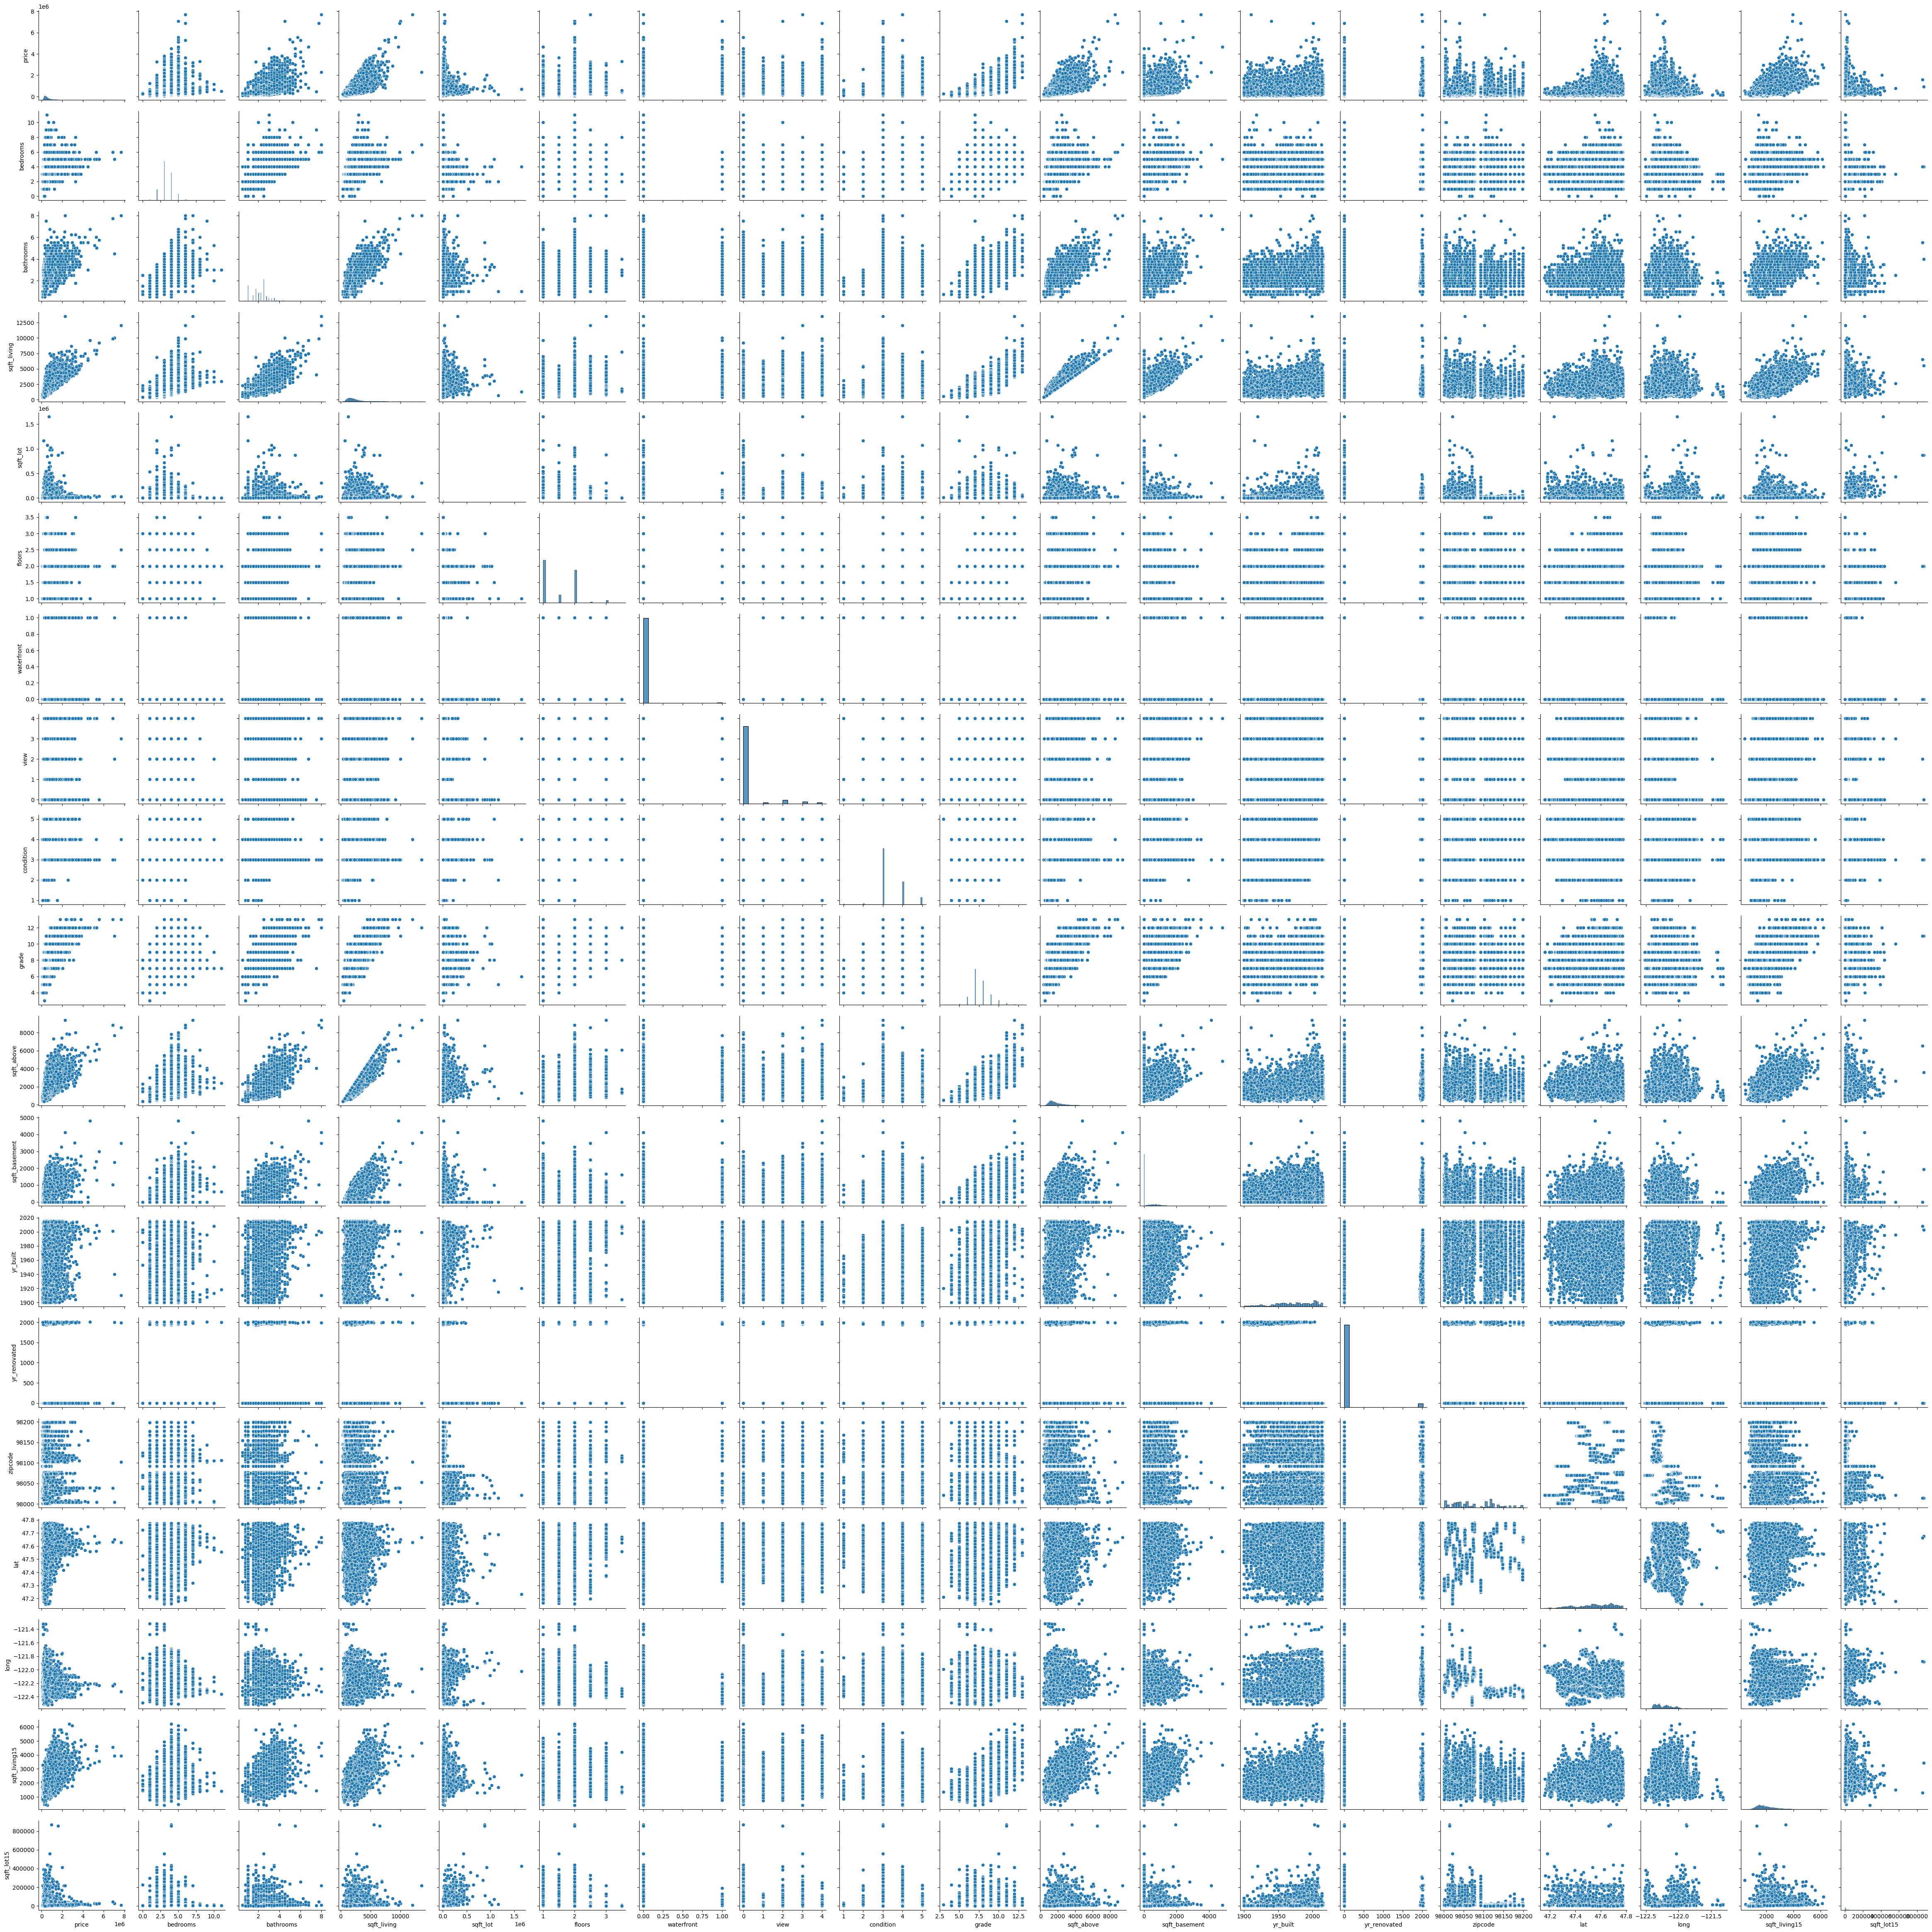

In [13]:
# Create a pair plot 

g = sns.pairplot(sub_2)

output_path = os.path.join(path, '04 Analysis','Visualizations', 'pairplot_house.png')
plt.savefig(output_path)

#### After looking at the plots zoomed in, majority of the plots have a typical cone shape facing towards the top right.  This follows a trend of "the bigger, the more expensive", which shows true in most variables.

#### I would like to further explore bedrooms, waterfront, yr_renovated grade, yr, built, and sqft_living.  Although most of these variables have little correlation to price, the shape of the plot leaves more to investigate.

### Create a categroical plot 

C:\Users\X1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


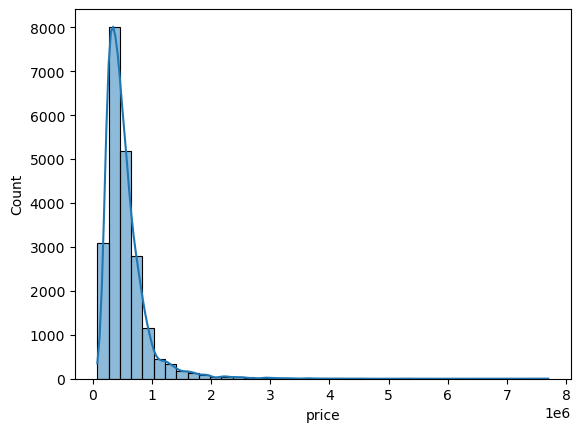

In [14]:
# Use histogram to show "price"

sns.histplot(df['price'], bins = 40, kde = True)

output_path = os.path.join(path, '04 Analysis','Visualizations', 'hist_price.png')
plt.savefig(output_path)

In [15]:
# Create flags for "price category"

df.loc[df['price'] < 500000, 'Price category'] = 'Low price'

In [16]:
df.loc[(df['price'] >= 500000) & (df['price'] < 1000000), 'Price category'] = 'Middle price'

In [17]:
df.loc[df['price'] >= 100000, 'Price category'] = 'High price'

In [18]:
df['Price category'].value_counts(dropna = False)

Price category
High price    21579
Low price        24
Name: count, dtype: int64

In [19]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Price category'],
      dtype='object')

C:\Users\X1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\X1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


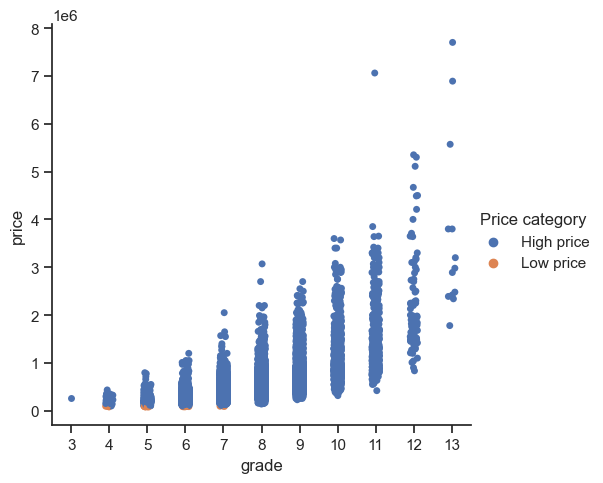

In [20]:
# Create categorical plot using price categories

sns.set(style="ticks")
g = sns.catplot(x="grade", y="price", hue="Price category", data=df)

output_path = os.path.join(path, '04 Analysis','Visualizations', 'catplot_grade.png')
plt.savefig(output_path)

#### Looking at a house' grade and price, we can see that lower graded homes were sold at a lower price and vice versa.  There are a few orange dots located at 4, 5, and 6 showing they were priced low.  We can also see a steady row of green dots all priced on the lower side, despite some having high grades.

## 3. Revisiting questions:

### 1. What factors have the most impact on the price of real estate?
### The factors that had the most impact on price were number of bathrooms, sqft of living space, sqft above ground, sqft of the 15 nearst homes, and grade level. All these variables had a strong correlation with price, meaning the bigger a variable, the higher the price of the home.

### 2. Is there a trend between price and location?
### Price and location had a weak-to-no correlation.  

### 3. What is the relationship between price and square feet?
### Square feet in terms of living space had a 0.7 correlation, meaning there was a strong relationship where the more square feet in a house led to higher prices.  It may be important to note that in terms of square feet of land, this did not have a strong correlation to price.

### 4. What is the relationship between price and number of bathrooms?
### Having a 0.53 indicated a strong relationship. The more bathrooms a house had, the higher the price it was sold at.  

### Hypothesis:

### If a home has a greater number of bathrooms, squarefeet, and grade level, the home will be of higher price.

In [21]:
# Export df

df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'house_data_cleaned1.csv'))